11490434/11490434 [==============================] - 0s 0us/step
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


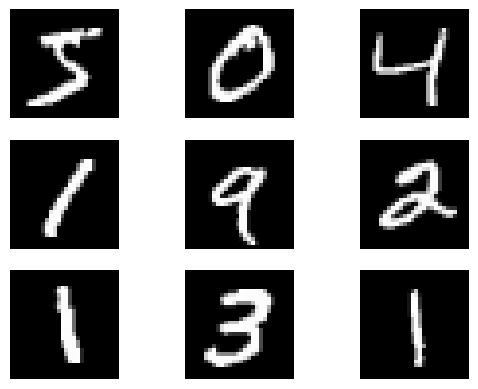

In [ ]:
from keras.datasets import mnist
from matplotlib import pyplot

# Loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Displaying the shape of the dataset
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

# Plotting the first 9 images
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_X[i], cmap='gray')
    pyplot.axis('off')  # Turn off the axis

pyplot.show()  # Show all the images in a single plot


In [4]:
x_train_flat = train_X.reshape(train_X.shape[0], -1) / 255.0
x_test_flat = test_X.reshape(test_X.shape[0], -1) / 255.0

x_train_flat.shape

(60000, 784)

In [7]:
x_test_flat.shape


(10000, 784)

In [43]:
import numpy as np
x_mean = np.mean(x_train_flat, axis=0)
x_mean_test = np.mean(x_test_flat,axis = 0)
data_centered = x_train_flat - x_mean
data_centered_test = x_test_flat-x_mean_test
cov_matrix = np.cov(data_centered, rowvar=False)



eigen_values,eigen_vectors = np.linalg.eigh(cov_matrix)
eigen_vectors.shape
eigen_values.shape



(784,)

In [44]:
sorted_indices = np.argsort(eigen_values)[::-1]
eigen_vectors = eigen_vectors[:, sorted_indices]

res_dimensions = eigen_vectors[:,:150]

transformed_data_train = np.dot(data_centered,res_dimensions)
transformed_data_test = np.dot(data_centered_test,res_dimensions)
transformed_data_train.shape

(60000, 150)

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 150).fit(x_train_flat)
x_train_pca = pca.transform(x_train_flat)
x_test_pca = pca.transform(x_test_flat)

x_test_pca.shape

(10000, 150)

In [38]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [40]:
clf = SVC(kernel='rbf',class_weight = 'balanced')

In [45]:
#scoring the pca transformed data
clf.fit(x_train_pca,train_y)
clf.score(x_test_pca,test_y)

0.9831

In [47]:
clf.fit(transformed_data_train,train_y)
clf.score(transformed_data_test,test_y)

0.9827

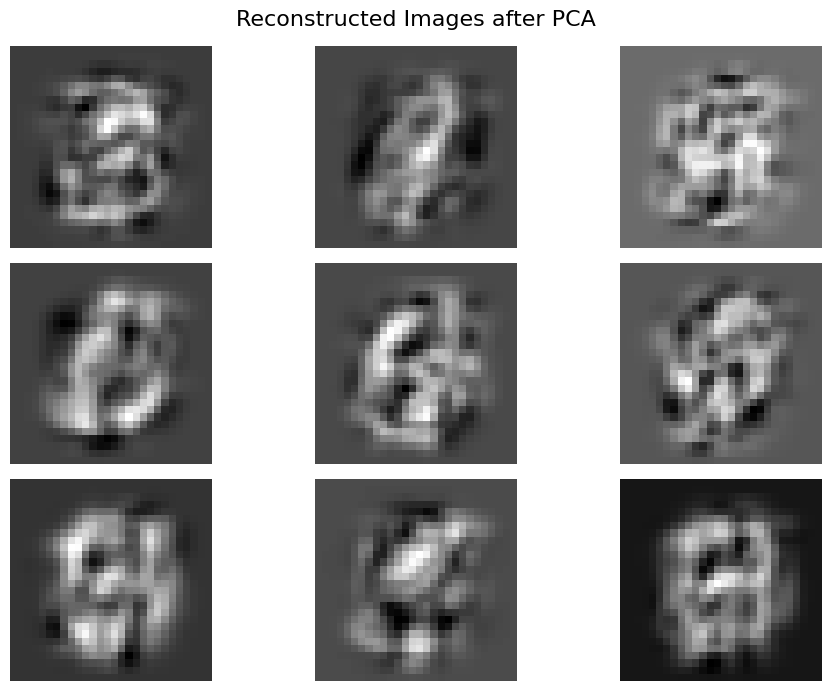

In [49]:
import matplotlib.pyplot as plt

reconstructed_images = pca.inverse_transform(transformed_data_train)

reconstructed_images = reconstructed_images.reshape((-1, 28, 28))

plt.figure(figsize=(10, 7))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(reconstructed_images[i], cmap='gray')
    plt.axis('off')
plt.suptitle('Reconstructed Images after PCA', fontsize=16)
plt.tight_layout()
plt.show()
